In [11]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
import researchpy
import pingouin as pg
import statsmodels.api as sm
import statsmodels.formula.api as smf
import more_itertools as mit
import math
import itertools

from scipy import stats
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from IPython.display import display, HTML
from itertools import chain
from pymer4.models import Lmer
from pingouin import ttest
from collections import Counter

from stats_learning_trig_analysis.stats_trig_load import load_files, perform_exlcusion_attention_aprime, perform_exlcusion_learning_acc
from stats_learning_trig_analysis.stats_trig_analysis import APrime


# Load in data, exclude and calculate A'

In [38]:
def organize(data, reindex):
    '''
    Organizes and cleans the raw df.
    :param a: the raw df
    :param b: reindex or not
    '''

    all_sub_raw = data.loc[
        data['test_part'] != 'prac', cols]
    all_sub_raw['correct'] = all_sub_raw['correct'] * 1
    new_index = list(range(len(all_sub_raw)))
    if reindex == True:
        all_sub_raw.reindex(new_index)
    else:
        pass
    return all_sub_raw


cols = ["trial_type", "trial_index", "rt", "stimulus", "key_press", "at_TrialType", "correct_response", "test_part", "TaskType", 'correct', 'at_counter', 'at_RunningMean', 'sd', 'slow', 'fast', 'slow_lr_counter', 'fast_lr_counter', \
        'lr_counter', 'slow_fl_counter', 'fast_fl_counter', 'fl_counter', 'at_TrailingMean', 'diff', 'attention_state', 'lr_trial_counter', 'filler', 'animation_sequence', 'responses', 'TD_rt', 'TD_target', 'TD_trial_number', \
        'init_locations', 'final_locations', 'responses', 'question_order', 'participant']

def perform_exlcusion_attention_aprime(all_sub_raw):
    '''
    Calculate overall mean and sd for APrime and apply exclusion criteria of 2.5sd from the mean
    :param a: raw df
    :return: df with only those who will be included
    '''
    stdev = 2
    plot_Trial = pd.DataFrame(all_sub_raw[['correct', 'at_TrialType', 'participant','test_part']].dropna())
    plot_Trial['correct'] = plot_Trial['correct'].astype(int)
    APrime_list = []
    for i in plot_Trial.participant.unique():
        freq_acc_sub = plot_Trial.loc[(plot_Trial['participant'] == i) & (plot_Trial['test_part'] == 'test') & (plot_Trial['at_TrialType'] == 'frequent')][
            'correct'].mean()
        infreq_acc_sub = plot_Trial.loc[(plot_Trial['participant'] == i) & (plot_Trial['test_part'] == 'test') & (plot_Trial['at_TrialType'] == 'infrequent')][
            'correct'].mean()

        #print(i)
        A = APrime(freq_acc_sub, 1 - infreq_acc_sub)
        #print(i, 'freq_acc_sub is ', freq_acc_sub)
        #print(i, 'infreq_acc_sub is ', infreq_acc_sub)
        #print(i, 'a is ', A)
        plot_Trial.loc[plot_Trial.participant == i, "APrime"] = A
        APrime_list.append(A)

    exclusion = plot_Trial.groupby('participant')['APrime'].mean().reset_index()
    #print(exclusion)
    overall_ap = plot_Trial['APrime'].mean()
    overall_sd = plot_Trial['APrime'].std()

    df_filtered = exclusion[(overall_ap - stdev * overall_sd < exclusion['APrime']) & (exclusion['APrime'] < overall_ap + stdev * overall_sd)]
    #print(overall_ap - 2 * overall_sd, overall_ap + 2 * overall_sd)
    print(overall_ap, overall_sd)
    print(overall_ap - stdev * overall_sd, overall_ap + stdev * overall_sd)
    include_participant = df_filtered.participant.unique()
    all_sub_raw = all_sub_raw.loc[(all_sub_raw['participant'].isin(include_participant))]

    return all_sub_raw, APrime_list, exclusion


def perform_exlcusion_learning_trial(all_sub_raw_index):
    '''
    Count the learning trials
    :param a: raw df
    :return: df with only those who will be included
    '''
    include_participant = []
    
    for i in all_sub_raw_index.participant.unique():

        fast_sub = len(all_sub_raw_index.loc[(all_sub_raw_index['participant'] == i) & (all_sub_raw_index['attention_state'] == 'fast')  & (all_sub_raw_index['TaskType'] == 'lr')])/3
        slow_sub = len(all_sub_raw_index.loc[(all_sub_raw_index['participant'] == i) & (all_sub_raw_index['attention_state'] == 'slow') & (all_sub_raw_index['TaskType'] == 'lr')])/3   
        print(i, fast_sub, slow_sub)

        if int(fast_sub) > 5 and int(slow_sub) > 5:
            
            include_participant.append(i)

    all_sub_raw_index = all_sub_raw_index.loc[(all_sub_raw_index['participant'].isin(include_participant))]

    return all_sub_raw_index


### start with 163 participants

In [52]:
### upload all 163 raw files
data_directory = '/Users/ziweizhang/Downloads/sa_sl_data_sh'
data_files = os.listdir(data_directory)
data = pd.concat(load_files(data_directory, data_files),ignore_index=True)
data_keep_index = pd.concat(load_files(data_directory, data_files),ignore_index=False)

all_sub_raw = organize(data,True)
all_sub_raw_index = organize(data_keep_index,False)
print(len(all_sub_raw))

bbe2c
738bd
497b8
1a97d
73da5
eddfd
a13c2
c2095
10bb2
98812
055e7
471ac
11341
025ce
91996
4df78
6f176
0c402
b8cd1
1b239
93c51
b29b4
cf32b
588b8
21342

41428
98dc0
e0583
93b38
b4050
8e2e4
ceefb
a1b8d
994d8
700ec
3865f
ca5fb
55d5b
62be0
48e01
3b5ed
8da97
88671
2097c
75c8f
889c9
88b5e
5880e
be7d9
d58d5
2bac9
64a05
4546b
00b10
0ad6c
cd759
9b1b9
f2ac2
a0630
f6a1b
5243e
1360c
479f5
fc5f6
44e6b
a3f26
da964
d656d
76e57
f91b2
19bb3
9f1f6
1d05f
43fef
ba694
ef865
a3d90
95ea8
6fe3f
9c2ee
893fa
52873
634cc
12cc6
f94cc
6c4a3
d4bee
2d137
15ff7
c9153
7fd37
9be92
bcd62
d6a9b
2d2a6
b3193
38dbb
5695b
2a81e
bd42c
f7401
864e7
2d861
9ba80
29dfb
86b55
7389d
c4cff
64aca
5f27c
6e6ee
de05a
7b5f6
426b3
1cd0f
0a34c
aa17e
1a1eb
afb0c
05bfb
394a2
a4e75
4e7f8
f7633
358da
e2f6b
2f143
0dd8c
c1d08
25fca
7d46d
d6502
b6a80
116f9
3fe7e
38612
dafd1
31179
723e0
7b91f
87e29
e02a7
ab81f
95151
d2fad
29f3d
a8517
a5b31
855f4
568f2
5dc39
5beae
a3938
2f6d9
eed9b
2a22f
6662c
cc17c
99c23
6b67d
f12e2
4d2a9
848f6
bbe2c
738bd
497b8
1a9

### perform A' exclusion

In [53]:
all_sub_raw_index, A_list, exclusion = perform_exlcusion_attention_aprime(all_sub_raw_index) #, exclusion
all_sub_raw , _,_= perform_exlcusion_attention_aprime(all_sub_raw)

print(all_sub_raw.participant.unique(),len(all_sub_raw.participant.unique()))

0.861398585087673 0.14996752419259204
0.5614635367024889 1.161333633472857
0.861398585087673 0.14996752419259204
0.5614635367024889 1.161333633472857
['bbe2c' '738bd' '497b8' '1a97d' '73da5' 'eddfd' 'a13c2' 'c2095' '10bb2'
 '98812' '055e7' '471ac' '11341' '025ce' '91996' '4df78' '6f176' '0c402'
 'b8cd1' '1b239' '93c51' 'b29b4' 'cf32b' '588b8' '21342' '41428' '98dc0'
 'e0583' '93b38' 'b4050' '8e2e4' 'ceefb' 'a1b8d' '994d8' '700ec' '3865f'
 'ca5fb' '55d5b' '62be0' '48e01' '3b5ed' '8da97' '88671' '2097c' '75c8f'
 '889c9' '88b5e' '5880e' 'be7d9' 'd58d5' '2bac9' '64a05' '4546b' '00b10'
 '0ad6c' 'cd759' '9b1b9' 'f2ac2' 'a0630' 'f6a1b' '5243e' '1360c' '479f5'
 'fc5f6' '44e6b' 'a3f26' 'da964' 'd656d' 'f91b2' '19bb3' '9f1f6' '1d05f'
 '43fef' 'ba694' 'ef865' 'a3d90' '95ea8' '6fe3f' '9c2ee' '893fa' '52873'
 '634cc' '12cc6' 'f94cc' '6c4a3' 'd4bee' '15ff7' 'c9153' '7fd37' '9be92'
 'bcd62' 'd6a9b' '2d2a6' 'b3193' '38dbb' '5695b' '2a81e' 'bd42c' 'f7401'
 '864e7' '2d861' '9ba80' '29dfb' '86b55' '7389d

1.16 0.56


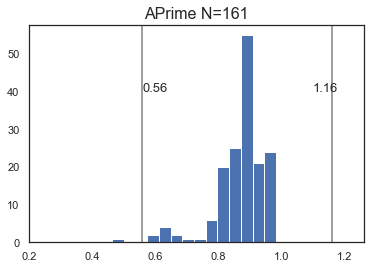

In [54]:
sub_after_ap = len(all_sub_raw.participant.unique())
overall_aprime_mean = 0.86
overall_aprime_sd = 0.15
UB = overall_aprime_mean + 2*overall_aprime_sd
LB = overall_aprime_mean - 2*overall_aprime_sd

plt.hist(A_list, bins= 50) #
plt.axvline(x=UB,color='gray')
plt.axvline(x= LB,color='gray')
plt.text(1.1,40,UB, fontsize=13)
plt.text(LB,40,LB, fontsize=13)

sub = str(len(all_sub_raw.participant.unique()))
plt.title('APrime N=' + str(sub_after_ap), fontsize=16)
plt.xlim(left=0.2)

print(UB,LB)

### perform trial count exclusion

In [55]:
all_sub_raw_index = perform_exlcusion_learning_trial(all_sub_raw_index)
all_sub_raw = perform_exlcusion_learning_trial(all_sub_raw)

bbe2c 13.0 13.0
738bd 12.0 15.0
497b8 25.0 22.0
1a97d 17.0 18.0
73da5 16.0 13.0
eddfd 27.0 29.0
a13c2 20.0 22.0
c2095 2.0 3.0
10bb2 19.0 16.0
98812 9.0 9.0
055e7 12.0 15.0
471ac 17.0 16.0
11341 28.0 25.0
025ce 15.0 15.0
91996 14.0 14.0
4df78 14.0 16.0
6f176 10.0 8.0
0c402 24.0 23.0
b8cd1 18.0 20.0
1b239 15.0 12.0
93c51 20.0 18.0
b29b4 19.0 19.0
cf32b 23.0 21.0
588b8 16.0 13.0
21342 7.0 4.0
41428 17.0 19.0
98dc0 12.0 13.0
e0583 24.0 21.0
93b38 16.0 18.0
b4050 21.0 22.0
8e2e4 5.0 8.0
ceefb 15.0 18.0
a1b8d 23.0 21.0
994d8 21.0 20.0
700ec 15.0 13.0
3865f 16.0 19.0
ca5fb 14.0 16.0
55d5b 18.0 20.0
62be0 19.0 17.0
48e01 3.0 6.0
3b5ed 21.0 22.0
8da97 14.0 13.0
88671 8.0 8.0
2097c 19.0 16.0
75c8f 17.0 14.0
889c9 21.0 24.0
88b5e 6.0 5.0
5880e 36.0 36.0
be7d9 22.0 19.0
d58d5 13.0 10.0
2bac9 15.0 17.0
64a05 21.0 21.0
4546b 25.0 23.0
00b10 18.0 20.0
0ad6c 18.0 20.0
cd759 8.0 11.0
9b1b9 10.0 7.0
f2ac2 10.0 7.0
a0630 16.0 18.0
f6a1b 18.0 17.0
5243e 26.0 27.0
1360c 13.0 16.0
479f5 26.0 24.0
fc5f6 13.0

In [57]:
sub_after_trial = len(all_sub_raw_index.participant.unique())
sub_after_trial

150

### generate all_sub_raw_E2.csv


In [ ]:
# all_sub_raw[["trial_type", "trial_index", "rt", "stimulus", "key_press", "at_TrialType", "correct_response", "test_part", "TaskType", 'correct', 'at_counter', 'at_RunningMean', 'sd', 'slow', 'fast', 'slow_lr_counter', 'fast_lr_counter', 'lr_counter', 'slow_fl_counter', 'fast_fl_counter', 'fl_counter', 'at_TrailingMean', 'diff', 'attention_state', 'lr_trial_counter', 'filler', 'animation_sequence', 'responses', 'TD_rt', 'TD_target', 'TD_trial_number', 'init_locations', 'final_locations', 'responses', 'question_order', 'participant']]\
# .to_csv('/Users/ziweizhang/Downloads/Stats_lr_trig_data/analysis_output/all_sub_raw_E2.csv',index=False)


# Generate Fig2a and 2b

In [58]:
freq_acc = all_sub_raw.loc[(all_sub_raw['at_TrialType'] == 'frequent')]['correct'].mean()
infreq_acc = all_sub_raw.loc[(all_sub_raw['at_TrialType'] == 'infrequent')]['correct'].mean()

hit = len(all_sub_raw.loc[(all_sub_raw['at_TrialType'] == 'frequent')& all_sub_raw['correct'] == 1])
miss = len(all_sub_raw.loc[(all_sub_raw['at_TrialType'] == 'frequent')& all_sub_raw['correct'] == 0])
fa = len(all_sub_raw.loc[(all_sub_raw['at_TrialType'] == 'infrequent')& all_sub_raw['correct'] == 0])
cr = len(all_sub_raw.loc[(all_sub_raw['at_TrialType'] == 'infrequent')& all_sub_raw['correct'] == 1])

hit_rate = hit/(hit+miss+fa+cr)
fa_rate = fa/(hit+miss+fa+cr)


APrime(freq_acc,1-infreq_acc)

APrime_list = []

for i in all_sub_raw.participant.unique():
    freq_acc_sub = all_sub_raw.loc[(all_sub_raw['participant'] == i) & (all_sub_raw['at_TrialType'] == 'frequent')]['correct'].mean()
    infreq_acc_sub = all_sub_raw.loc[(all_sub_raw['participant'] == i) & (all_sub_raw['at_TrialType'] == 'infrequent')]['correct'].mean()
    
    A = APrime(freq_acc_sub,1-infreq_acc_sub)
    APrime_list.append(A)

DescribeResult(nobs=150, minmax=(0.6140361144457613, 0.9789186507936645), mean=0.8839186336670781, variance=0.003088828518207373, skewness=-0.9615612435037122, kurtosis=2.8997931500259773)
0.05557723021352695


/Users/ziweizhang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


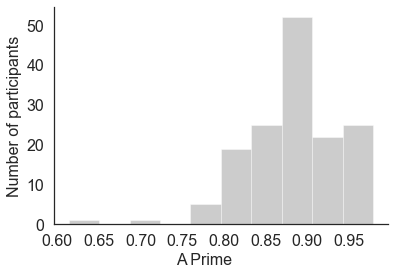

In [59]:
sns.set(style="white")
AP = exclusion.loc[exclusion['participant'].isin(all_sub_raw_index.participant.unique()), 'APrime'].tolist()
sns.distplot(AP,bins = 10,kde=False,color="gray")

plt.ylabel('Number of participants',fontsize=16)
plt.xlabel('A Prime',fontsize=16,position=(0.45,0))
sns.despine()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

print(stats.describe(AP))
print(statistics.stdev(AP))
#plt.savefig('/Users/ziweizhang/Downloads/Stats_lr_trig_data/analysis_output/E2/Fig2a.pdf',bbox_inches = "tight")
     


In [60]:
pre_zero_infreq_count_list = [] #count the number of zero averaged infrequent for each subject, fast

control_excl_trailingRT = pd.DataFrame() #get the actual df of fillers excluding zero averaged fillers for all subjects

for s in all_sub_raw_index.participant.unique():
    
    sub = all_sub_raw_index.loc[(all_sub_raw_index['participant']== s) &
                                (all_sub_raw_index['at_TrialType'] == 'infrequent'),:] # get index of all infrequent trials
    sub_lr = all_sub_raw_index.loc[(all_sub_raw_index['participant']== s),:] # get all trials of this subject

    
    # locate 'freqeunt' 'at' trials in each individual
    frequent_at = all_sub_raw_index.loc[(all_sub_raw_index['participant']== s) &
                                (all_sub_raw_index['at_TrialType'] == 'frequent')&
                                (all_sub_raw_index['TaskType'] == 'at'),:]
    frequent_at_index = frequent_at.index
    
    
    # locate 3 pre infrequent trials in each individual
    position_pre_infreq =[] 
    pre_zero_infreq_count = 0
    position_control_withprezero_infreq = []
    for i in sub.index[::3]: #index of all infrequent trials

        #take this i number, compare it with frequent_at_index, find the last three index
        smaller_at = sorted(x for x in frequent_at_index if x < i)
        previous_at_three = smaller_at[-3:] #this is a small list of 3 trials of pre-infrequent

        position_pre_infreq.append(previous_at_three) 

        #locate these three index numbers in frequent_at, select rt       
        position_pre_control_infreq_sub = sub_lr.loc[sub_lr.index.isin(previous_at_three), 'rt'].values.tolist()

        cont = np.count_nonzero(np.isnan(position_pre_control_infreq_sub)) # count if there's a nan in there   


        if cont != 0: # if there's a null in rt
            pre_zero_infreq_count += 1
            position_control_withprezero_infreq.append(i)
        
        else:
            pass

    pre_zero_infreq_count_list.append(pre_zero_infreq_count) #count how many infrequent has pre-filler zero for this subject

    #find within each subject where the infrequent trial after zero mean is located, and exclude those trials 
    sub_fl_excl_infreq = sub.loc[~sub.index.isin(position_control_withprezero_infreq)]


    control_excl_trailingRT = pd.concat([control_excl_trailingRT, sub_fl_excl_infreq]) #concat final infrequent data for later
    


In [61]:
print(len(pre_zero_infreq_count_list), sum(pre_zero_infreq_count_list))
print(sum(pre_zero_infreq_count_list)/(120*150))

150 368
0.020444444444444446


In [62]:
infrequent = control_excl_trailingRT[['at_TrailingMean','correct','participant']] 
infrequent = infrequent.loc[(infrequent['at_TrailingMean'].isnull() == False) & (infrequent['at_TrailingMean'] != 0)] 
infrequent['at_TrailingMean'] = infrequent['at_TrailingMean'].astype('float').astype('int')

sns.set(style="white")
lapses_plot = infrequent.groupby('correct').mean()
lapses_plot['se'] = infrequent.groupby('correct').sem()

lapses_plot.index.astype(str)
lapses_plot.rename(index={0:'Incorrect'},inplace=True)
lapses_plot.rename(index={1:'Correct'},inplace=True)

lapses_dot = infrequent.groupby(['correct','participant']).mean()

In [63]:
# count how many trials each participant has for each condition
total_trial_count = all_sub_raw_index.groupby(['test_part','participant']).count().reset_index()

infrequent_trial_pre_exclusion = all_sub_raw.loc[(all_sub_raw['at_TrialType']== "infrequent") &\
                                   (all_sub_raw['test_part'] == "test"),['participant','trial_type']]

infrequent_trial_count = infrequent_trial_pre_exclusion.groupby(['participant']).count().reset_index()
infrequent_trial_count

,participant,trial_type
0,00b10,120
1,025ce,120
2,055e7,120
3,05bfb,120
4,0a34c,120
...,...,...
145,f7401,120
146,f7633,120
147,f91b2,120
148,f94cc,120


In [64]:
total_trial_count = total_trial_count.loc[(total_trial_count['test_part'] == 'test'),['participant','trial_type']]
total_trial_count

,participant,trial_type
448,00b10,1422
449,025ce,1428
450,055e7,1425
451,05bfb,1395
452,0a34c,1521
...,...,...
593,f7401,1389
594,f7633,1401
595,f91b2,1422
596,f94cc,1383


In [65]:
trial_count = infrequent_trial_count.merge(total_trial_count, how='left', on='participant')
trial_count = trial_count.rename(columns={'trial_type_x': 'infrequent_count', 'trial_type_y': 'total_count'})

trial_count['infrequent_ratio'] = trial_count['infrequent_count']/trial_count['total_count']
trial_count

,participant,infrequent_count,total_count,infrequent_ratio
0,00b10,120,1422,0.084388
1,025ce,120,1428,0.084034
2,055e7,120,1425,0.084211
3,05bfb,120,1395,0.086022
4,0a34c,120,1521,0.078895
...,...,...,...,...
145,f7401,120,1389,0.086393
146,f7633,120,1401,0.085653
147,f91b2,120,1422,0.084388
148,f94cc,120,1383,0.086768


In [66]:
incorr_list = list(lapses_dot.loc[0]['at_TrailingMean'])
corr_list = list(lapses_dot.loc[1]['at_TrailingMean'])

trailing = pd.DataFrame({'trial_type': ['incorrect'] * len(incorr_list) + ['correct'] * len(corr_list), \
                       'rt': incorr_list + corr_list})
trailing_dot = pd.DataFrame({'incorrect': incorr_list, 'correct': corr_list})

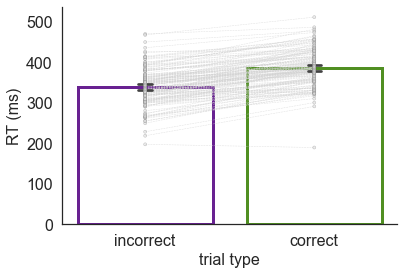

In [67]:
my_pal = {'incorrect': 'gainsboro','correct': 'gainsboro'}
ax = sns.barplot(x="trial_type", y="rt", data=trailing, ci =95, capsize = 0.08)

sns.stripplot(x="trial_type", y="rt", data=trailing, s = 3,\
                   dodge=True, jitter = False, linewidth = 0.5, palette = my_pal, alpha=.5, ax=ax)

ax.patches[0].set_edgecolor("#682191")
ax.patches[1].set_edgecolor("#508f22")
ax.patches[0].set_linewidth(3)
ax.patches[1].set_linewidth(3)
ax.patches[0].set_facecolor('white')
ax.patches[1].set_facecolor('white')

plt.legend([],[], frameon=False)
plt.ylabel('RT (ms)',fontsize = 16)
plt.xlabel('trial type',fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.despine()


for idx in trailing_dot.index:
    ax.plot(trailing_dot.loc[idx,['incorrect','correct']].index, \
            trailing_dot.loc[idx,['incorrect','correct']], color = 'lightgrey', \
            linewidth = 0.5, linestyle = '--', zorder=1,alpha=0.7)

#plt.savefig('/Users/ziweizhang/Downloads/Stats_lr_trig_data/analysis_output/E2/Fig2b.pdf',bbox_inches = "tight")
    

In [68]:
incorr_list = []
corr_list = []

for i in infrequent.participant.unique():
    incorr_rt_sub = infrequent.loc[(infrequent['participant'] == i) & (infrequent['correct'] == 1)]['at_TrailingMean'].mean()
    corr_rt_sub = infrequent.loc[(infrequent['participant'] == i) & (infrequent['correct'] == 0)]['at_TrailingMean'].mean()
    
    incorr_list.append(incorr_rt_sub)
    corr_list.append(corr_rt_sub)
    

print(len(incorr_list),len(corr_list), stats.ttest_rel(incorr_list,corr_list))
pg.ttest(incorr_list,corr_list, paired=True)

150 150 Ttest_relResult(statistic=23.784597194356007, pvalue=1.3629114230777715e-52)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,23.784597,149,two-sided,1.362911e-52,"[43.12, 50.94]",1.019925,1.28e+49,1.0
